In [ ]:
#---------------------------------------------------------------------------------
# Project    : Erasmus + NEON
# Authors    : J. Martin Ayarde , Graciela Corral Briones
# Affiliation: UNC , UNC
# E-mail     : martin.ayarde@unc.edu.ar , graciela.corral@unc.edu.ar
#---------------------------------------------------------------------------------

# Ejemplo típico de un problema de PRUEBA DE HIPOTESIS aplicado a sistemas de comunicaciones ópticos.
En esta Jupyter notebook se desarrolla el ejemplo 2.4 de la página 26 planteado en el libro de referencia de la materia.
## Variable aleatoria con una distribución de Poisson
Empecemos analizando mediante su histograma, su media y su varianza a una variable aleatoria discreta 'z' que tiene una distribución de Poisson con intensidad $λ_0$. Para ello modifique el valor de $λ_0$ en el siguiente código y observe como impacta este cambio.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

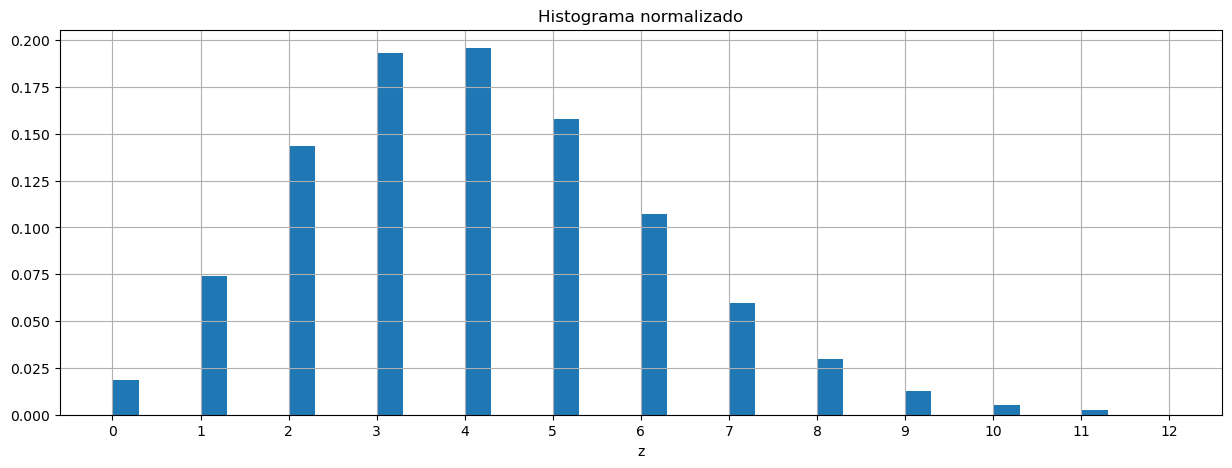

La media de la variable z es: 4.00822

La varianza de la variable z es: 3.9917124316000003


In [11]:
lambda0 = 4
numberOfsamples = 100000
# Analizando la estadística de una variable aleatoria
z =  np.random.poisson(lambda0, numberOfsamples)

plt.figure(figsize=(15,5))
plt.hist(z, bins = 12, range = (0,12), density = True , width = 0.3, align='mid')
plt.xlabel('z')
plt.title('Histograma normalizado')
plt.xticks(range(0, 13))
plt.grid()
plt.show()
print("La media de la variable z es:", np.mean(z))
print("\nLa varianza de la variable z es:", np.var(z))

## Probabilidades condicionadas asociadas a la transmisión de las hipótesis
Lo que hace interesante al problema planteado en el ejemplo es que es imposible determinar con total certeza la hipótesis transmitida (H) a partir de la señal discreta (Y) obtenida a la salida del fotodetector. Incluso si el LED del transmisor está apagado, es probable que el fotodetector detecte algunos fotones (por ejemplo, debido a la “luz ambiental”). En base a investigaciones realizadas sobre esta situación, resulta ser una buena suposición afirmar que Y tiene una distribución de Poisson con intensidad λ, la cual depende de si el LED está encendido o apagado. Matemáticamente esto se expresa de la siguiente forma:

Cuando $\quad H=0,\quad Y \sim P_{Y|H}(y|0)=\frac{λ_0^y}{y!}e^{-λ_0}$

Cuando $\quad H=1,\quad Y \sim P_{Y|H}(y|1)=\frac{λ_1^y}{y!}e^{-λ_1}$

donde $0\leqslantλ_0<λ_1$.

Realicemos una simulación del problema utilizando para ello dos generadores de variables de distribución de Poisson parametrizado cada uno ellos con un valor distinto de intensidad $λ$. A continuación grafiquemos en una misma figura los histogramas de la variable aleatoria $Y$ para cada una de las hipótesis $H$ transmitidas. Se puede considerar a estos histogramas como representaciones de las probabilidades condicionales $P_{Y|H}(y|1)$ y $P_{Y|H}(y|0)$

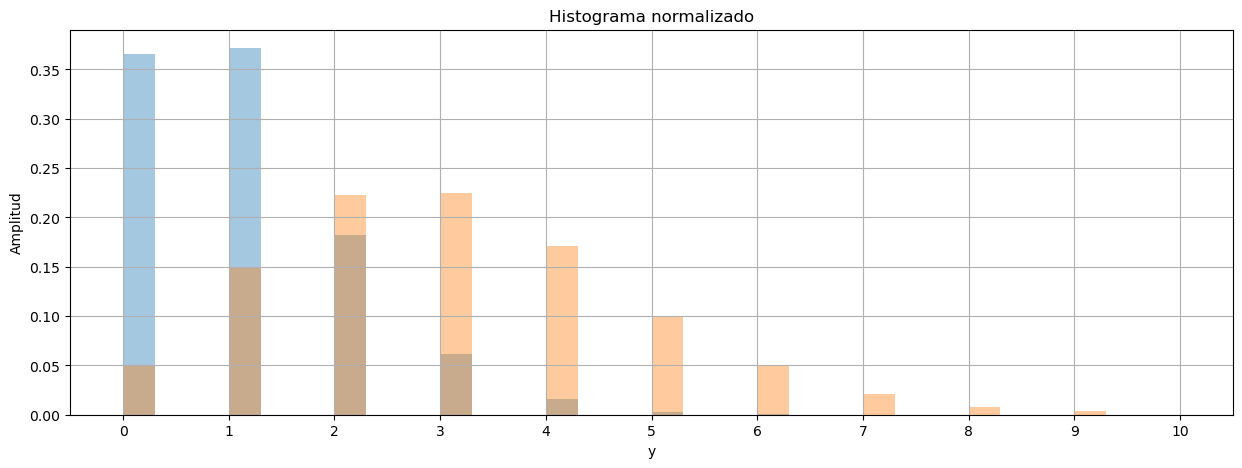

In [17]:
lambda0 = 1
lambda1 = 3
numberOfsamples = 50000

# Analizando la estadística
signal_received_h0 =  np.random.poisson(lambda0, numberOfsamples)
signal_received_h1 = np.random.poisson(lambda1, numberOfsamples)

plt.figure(figsize=(15,5))
plt.hist(signal_received_h0,bins = 10, range = (0,10), density = True , width = 0.3, align='mid', alpha = 0.4)
plt.hist(signal_received_h1, bins = 10 , range = (0,10), density = True , width =0.3, align='mid', alpha = 0.4)
plt.xlabel('y')
plt.xticks(range(0, 11))
plt.ylabel('Amplitud')
plt.title('Histograma normalizado')
plt.grid()
plt.show()

## Análisis cualitativo para la determinación del nivel de decisión
Mediante un análisis cualitativo de los histogramas, es posible determinar el nivel de decisión, llamado también nivel de referencia, que va a usar el receptor para decidir (decodificar) cual es la hipótesis que tiene más probabilidad de haber sido transmitida en cualquier instante de tiempo dado. Para determinar este nivel basta con encontrar en que valor de $y$ la frecuencia relativa de los histogramas se igualan o al menos se encuentran más próximas entre ellas. Para el caso de $λ_0 = 1$ y $λ_1 = 3$ se puede observar que el valor de decisión esta dado para un $y=2$.

## Análisis cuantitativo para la determinación del nivel de decisión: Regla de decisión de Máxima Verosimilitud.
Para el caso de hipótesis (H) equiprobables y observaciones (Y) discretas (que es el caso de nuestro ejemplo), la regla de decisión de máxima verosimilitud (del inglés Maximum Likelihood decision Rule) o ML, establece que la hipótesis transmitida más probable dada la observación Y en un instante de tiempo dado es aquella que cumple con la siguiente relación:

$\hat{H}(y)=  \underset{i\in \mathcal{H}}{\operatorname{argmax}} P_{Y|H}(y|i)$

Para el caso de test de hipótesis binaria (que es el caso de nuestro ejemplo) la regla de decisión ML queda simplificada a la siguiente expresión:

$P_{Y|H}(y|1)\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}P_{Y|H}(y|0)$

Si reemplazamos en esta relación a $P_{Y|H}(y|1)$ por $\frac{λ_1^y}{y!}e^{-λ_1}$ y a $P_{Y|H}(y|0)$ por $\frac{λ_0^y}{y!}e^{-λ_0}$ y utilizando las intensidades $λ_1=3$ y $λ_0=1$ se obtiene la siguiente inecuación:

$y\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}1.8$

la cual nos está indicando que en teoría, el nivel de decisión del receptor debe estar ubicado un valor igual 1.8. Este resultado es coherente con el resultado obtenido en nuestro análisis cualitativo previo del problema.

## Simulación Monte Carlo que permite evaluar la calidad del receptor para un nivel de decisión dado.  
A continuación se realiza una simulación que permite determinar la calidad del sistema de comunicaciones optico descripto en el ejemplo para valores dados de $\lambda_0$ y $\lambda_1$ y un nivel de decisión establecido.

In [ ]:
# Simulador de sistema de comunicaciones óptico dado por: hipótesis + canal + receptor

# TRANSMISOR: GENERADOR DE HIPOTESIS
hypothesis = np.random.randint(0,2,numberOfsamples)
print("Impresión de las primeras 30 hipotesis transmitidas:\n",hypothesis[0:30])
# SALIDA DEL CANAL
y = [np.random.poisson(lambda1) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(numberOfsamples)]
print("\nImpresión de las primeras 30 muestras observadas a la salida del canal:\n",y[1:30])
# RECEPTOR: DECODIFICADOR DE HIPOTESIS
threshold = 1.8
hypothesis_decoded = [1 if y[i]>=threshold else 0 for i in range(numberOfsamples)]
print("\nImpresión de las primeras 30 hipotesis decodificadas por el receptor:\n",hypothesis_decoded[1:30])
#Análisis de la calidad (desempeño) del receptor mediante su probabilidad de error (pe)
pe = sum((hypothesis != hypothesis_decoded))/numberOfsamples
print("\nLa Probabilidad de error en la decodificacion de la hipotesis es de:\n",pe)

Impresión de las primeras 30 hipotesis transmitidas:
 [0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0]

Impresión de las primeras 30 muestras observadas a la salida del canal:
 [1, 3, 1, 2, 1, 4, 1, 1, 4, 2, 1, 1, 2, 0, 3, 3, 0, 0, 5, 5, 6, 1, 1, 1, 5, 1, 1, 3, 1]

Impresión de las primeras 30 hipotesis decodificadas por el receptor:
 [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]

La Probabilidad de error en la decodificacion de la hipotesis es de:
 0.23062


Evaluando el sistema simulado para distintos valores de nivel de decisión (threshold) se puede llegar a la conclusión de que el sistema alcanza su mejor desempeño para un valor de threshold = 1.8.

## Pe vs Intensidad
Sea $y$ la cantidad de fotones a la salida del foto detector. La media y varianza está dada por
$$\mu = E\{y\}=\sum_{y=0}yp(y)=\sum_{y=0}yp(y/ho)p(ho)+\sum_{y=0}yp(y/h1)p(h1)=\lambda_o p(ho)+\lambda_1p(h1)$$
$$\sigma^2=E\{(y-\mu)^2\}=\lambda_o p(ho)+\lambda_1p(h1)$$
Si consideramos que el promedio de fotones recibido es una medida de la intensidad lumínica promedio, $\rho$, podemos graficar como varía la probabilidad de error a medida que aumneta $\rho$


Los valores de Bit Error Rate(BER) obtenidos fueron:
 [3.3644e-01 2.3128e-01 1.0126e-01 3.1660e-02 6.1000e-03 1.8000e-04] 



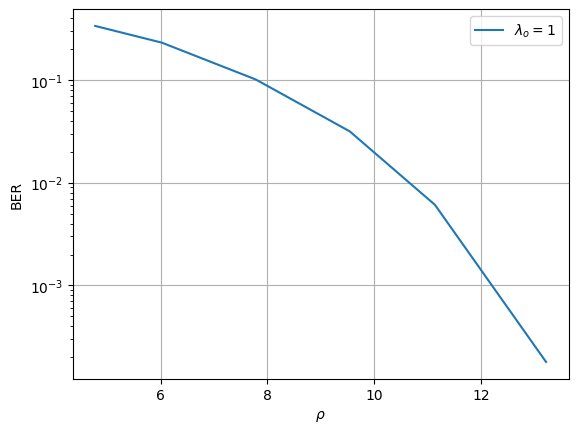

In [ ]:
# Las diferentes SNR se generan variando lambda1
import numpy as np
import matplotlib.pyplot as plt

lambda1 = np.array([2, 3, 5, 8, 12, 20])
Intensidad_dB = 10*np.log10(lambda0 + lambda1)
ber = np.array([])
lambda0 = 1
for lambdaX in lambda1:
  # SALIDA DEL CANAL
  y = [np.random.poisson(lambdaX) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(numberOfsamples)]
  # RECEPTOR
  nivel =  (lambdaX-lambda0)/np.log(lambdaX/lambda0)
  hypothesis_detected = [1 if y[i]>nivel else 0 for i in range(numberOfsamples)]
  ber = np.append(ber, sum(abs(np.array(hypothesis_detected) - hypothesis))/numberOfsamples)
print("Los valores de Bit Error Rate(BER) obtenidos fueron:\n",ber,"\n")

plt.semilogy(Intensidad_dB, ber)
plt.xlabel(r'$\rho$')
plt.ylabel('BER')
plt.legend(['$\lambda_o = 1$'])
plt.grid()
plt.show()

[![CC BY 4.0][cc-by-shield]][cc-by]

This work is licensed under a
[Creative Commons Attribution 4.0 International License][cc-by].

[![CC BY 4.0][cc-by-image]][cc-by]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-image]: https://i.creativecommons.org/l/by/4.0/88x31.png
[cc-by-shield]: https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg

![logo_neon_erasmus](https://raw.githubusercontent.com/neon-iot/communication_labs/main/detection_theory/notebooks/images/BannerSupportErasmus_.png)